### Classification Models
- KNN
- Logistic Regression
- SVM
- Decision Tree
- Random Forest Tree 

#### K Nearest Neighbors Classifier
- Simple and easy to impelement 
- Main disadvantage is if dataset contains large amount of data, then execution of KNN will become slow.


**How does KNN work**
- Step1: Select K no of of neighbors ( K = 3,4,5,6,....)
- Step2: Calculate the distance between the new data point and nearest neighbors
    - **Distance Formula:** Sqrt( (X2 - X1)^2 + (Y2 - Y1)^2 )
- Step3: It will assign the new data point to the nearest class
- Step4:

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nagamounika5/Datasets/master/IRIS.csv')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [3]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

In [5]:
len(df['species'].value_counts())

3

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
X1 = df.drop(['species'], axis = 1)
Y1 = df['species']

In [8]:
X1.head(2)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [9]:
## Split the dataset into training and testing(20%)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y1,test_size=0.2,random_state = 22)

In [12]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [13]:
## Apply KNN Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)

In [16]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_predict1 = knn.predict(X_test)
y_predict1

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [18]:
X_test.head(2)

,sepal_length,sepal_width,petal_length,petal_width
10,5.4,3.7,1.5,0.2
115,6.4,3.2,5.3,2.3


In [19]:
knn.predict([[5.0,2.7,4.5,2.2]])

array(['Iris-virginica'], dtype=object)

In [20]:
Y_test[:2]

10        Iris-setosa
115    Iris-virginica
Name: species, dtype: object

In [21]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Evaluation Metrics for Classification models
1. Confusion Matrix
2. Accuracy

In [22]:
## Confusion Matrix
#======================

## Total Animals = 50, Birds = 50, Humans = 50


##             Animals      Birds     Humans

## Animals       50          0         0

## Birds         0           45        5

## Humans        0            2       48

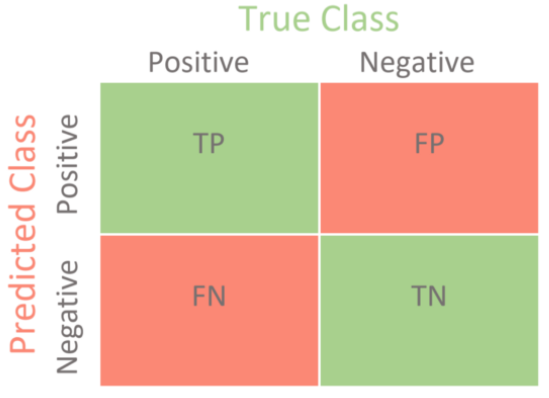

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
confusion_matrix(Y_test, y_predict1)

array([[ 6,  0,  0],
       [ 0, 10,  0],
       [ 0,  1, 13]], dtype=int64)

In [25]:
Y_test.shape

(30,)

In [ ]:
##                         TP + TN
## accuracy_score = ----------------------
##                    TP + TN + FP + FN


##                        6 + 10 + 13
## accuracy_score = ------------------------
##                     6 + 10 + 13 + 1 


In [26]:
( 6 + 10 + 13) / (6 + 10 + 13 + 1)

0.9666666666666667

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(Y_test, y_predict1)

0.9666666666666667

- If we are not satisfied with accuracy, increase K value

In [29]:
knn2 = KNeighborsClassifier(n_neighbors = 5)

In [30]:
knn2.fit(X_train, Y_train)

KNeighborsClassifier()

In [31]:
y_predict2 = knn2.predict(X_test)

In [32]:
accuracy_score(Y_test, y_predict2)

0.9666666666666667

In [33]:
df2 = pd.read_csv('https://raw.githubusercontent.com/harika-bonthu/SupportVectorClassifier/main/datasets_229906_491820_Fish.csv')
df2.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
## Check null values
## No of values in Species column
## Check column data types

In [34]:
df2.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [37]:
df2['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [40]:
type(df2['Species'].value_counts())

pandas.core.series.Series

In [38]:
len(df2['Species'].value_counts())

7

In [39]:
df2['Species'].value_counts().index

Index(['Perch', 'Bream', 'Roach', 'Pike', 'Smelt', 'Parkki', 'Whitefish'], dtype='object')

In [41]:
X2 = df2.drop(['Species'], axis = 1)
Y2 = df2['Species']

In [ ]:
## Apply KNN Classifier

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn3 = KNeighborsClassifier(n_neighbors = 3)

In [44]:
knn3.fit(X2, Y2)

KNeighborsClassifier(n_neighbors=3)

In [45]:
y_predict3 = knn3.predict(X2)

In [46]:
confusion_matrix(Y2, y_predict3)

array([[33,  0,  2,  0,  0,  0,  0],
       [ 0,  9,  1,  0,  1,  0,  0],
       [ 3,  3, 49,  0,  0,  1,  0],
       [ 6,  0,  3,  8,  0,  0,  0],
       [ 2,  2,  9,  0,  5,  1,  1],
       [ 0,  0,  0,  0,  0, 14,  0],
       [ 0,  0,  4,  0,  0,  0,  2]], dtype=int64)

In [47]:
accuracy_score(Y2, y_predict3)

0.7547169811320755

In [48]:
knn4 = KNeighborsClassifier(n_neighbors = 5)

In [49]:
knn4.fit(X2, Y2)
y_predict4 = knn4.predict(X2)

In [50]:
confusion_matrix(Y2, y_predict4)

array([[31,  0,  4,  0,  0,  0,  0],
       [ 0,  5,  4,  0,  1,  0,  1],
       [ 4,  1, 47,  1,  2,  1,  0],
       [ 6,  0,  3,  8,  0,  0,  0],
       [ 1,  0, 13,  0,  4,  1,  1],
       [ 0,  0,  0,  0,  0, 14,  0],
       [ 0,  0,  4,  0,  0,  0,  2]], dtype=int64)

In [51]:
accuracy_score(Y2, y_predict4)

0.6981132075471698

### Logistic Regression:
- This is one of the classification model.
- The classification done using the binary values (0 / 1 or Yes / No)
- The plot joining the 0 and 1 will be sigmoid curve or s-curve.

 **Formula for Logistic Regression**
![formula for logistic regression](formula.png)

![image.png](linear_vs_logistic_regression.jpg)


**Types of Logistic regression:**
* Binomial regression --- only two categories will be considered
    - ex: yes or no, male or female, 0 or 1
* Multinomial Regression --- more than 3 unordered categories
    - ex: sad,happy,normal
* Ordinal Regression --- more than 3 ordered categories.
    - ex: 1,2,3,4,5 or Grade A, Grade B, Grade C..

In [58]:
shirt_df = pd.read_csv("https://raw.githubusercontent.com/nagamounika5/Datasets/master/Tshirt_size.csv")
shirt_df

,Height,Weight,Shirt_Size
0,158,58,m
1,158,59,m
2,158,63,m
3,160,59,m
4,160,60,m
5,163,60,m
6,163,61,m
7,160,64,l
8,163,64,l
9,165,61,l


In [60]:
shirt_df.isnull().sum()

Height        0
Weight        0
Shirt_Size    0
dtype: int64

In [61]:
x = shirt_df[['Height','Weight']]
y = shirt_df['Shirt_Size']

In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [64]:
lr.fit(x,y)

LogisticRegression()

In [65]:
lr.predict([[150,52]])

array(['m'], dtype=object)

In [67]:
data = pd.read_csv("https://raw.githubusercontent.com/AP-State-Skill-Development-Corporation/Datasets/master/Classification/Heart_disease.csv")
data.head(2)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes


- remove **Unnamed: 0** column
- Fill all null values with mean or most occured value in that column.
- apply labelencoder to **'ChestPain'** and **'Thal'** columns
- split the data for training and testing.
- feed the data to model.

In [68]:
data.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64